# MNIST USPS Transport Distances

This notebook shows an example of computing optimal transport distances between the MNIST dataset and the USPS dataset with and without label distances

In [1]:
import sys
sys.path.append('../OTDD/')

import torch
from torchvision import datasets, transforms
import pandas as pd
import numpy as np

from otdd import *
from plot import *

from mnist_helper import *

# Load Data

In [2]:
mnist_data = get_mnist_data()

In [3]:
usps_data = get_usps_data()

In [4]:
# subset to 5000 examples for speed
mnist_sample = mnist_data.subsample(5000, equal_classes=True)
usps_sample = usps_data.subsample(5000, equal_classes=True)

# Set Up Distance and Cost Functions

Here we use euclidean distance as our ground cost metric and the Sinkhorn algorithm to compute the optimal coupling

In [5]:
distance_function = POTDistance(distance_metric='euclidean')

In [10]:
cost_function = SinkhornCost(distance_function, 0.1)

# Feature Distance

Here we compute the cost and optimal coulpling using only the feature space

In [11]:
outputs = cost_function.distance(mnist_sample.features, usps_sample.features)

In [12]:
outputs[0] # transportation cost

28.777107924374263

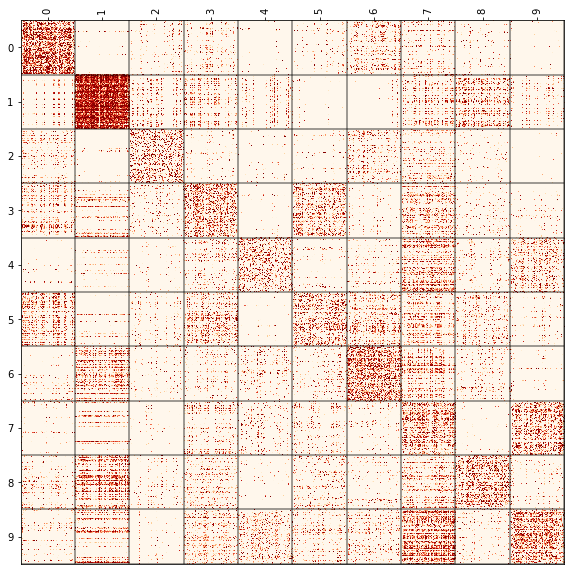

In [13]:
plot_coupling(outputs[1], outputs[2], mnist_sample.labels, usps_sample.labels,
                  mnist_sample.classes, usps_sample.classes, figsize=(10,10), cmap='OrRd')

# Label Distance

Here we compute the cost and optimal coupling with label distances

In [14]:
outputs2 = cost_function.distance_with_labels(mnist_sample.features, usps_sample.features, 
                                              mnist_sample.labels, usps_sample.labels, gaussian_class_distance=True)

precomputing
computing
0
1
2
3
4
5
6
7
8
9
distance finished
indexing
final cost


In [15]:
outputs2[0] # transport cost

40.62320786741969

Using label distances incorporates class-to-class similarity in coupling

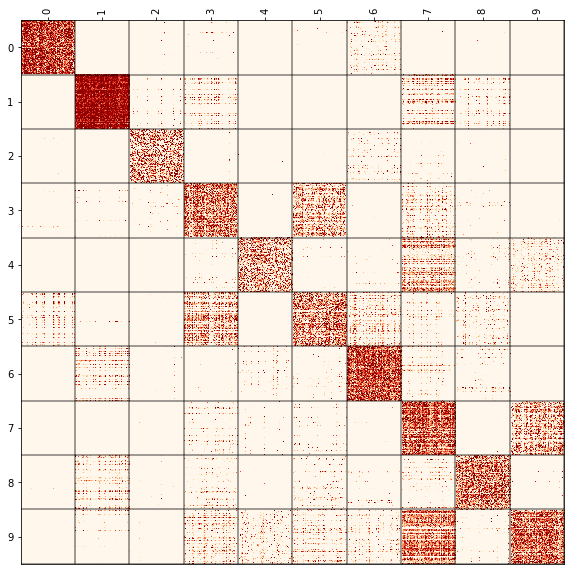

In [16]:
plot_coupling(outputs2[1], outputs2[2], mnist_sample.labels, usps_sample.labels,
                  mnist_sample.classes, usps_sample.classes, figsize=(10,10), cmap='OrRd')

Here are the label-to-label distances

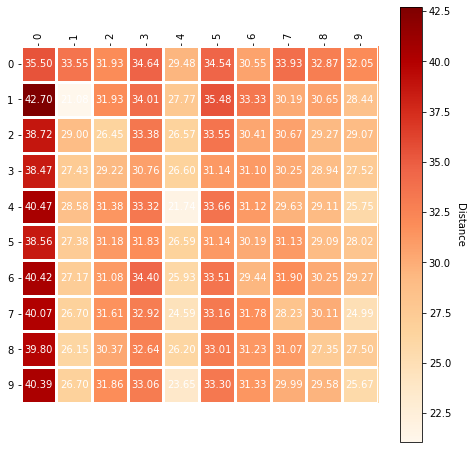

In [17]:
plot_class_distances(outputs2[3], mnist_sample.classes, usps_sample.classes, 
                            cmap='OrRd', figsize=(8,8), text=True)